In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import sklearn
import seaborn as sns
import datetime

### Argentina

In [283]:
#Reading in the datasets
Ar_df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Argentina.csv")
Ar_df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,L. Messi,31,Argentina,94,94,110500000.0,565000.0,2202,Left,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attacker,31-35
1,P. Dybala,24,Argentina,89,94,89000000.0,205000.0,2092,Left,3.0,...,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M,Attacker,22-25
2,S. Agüero,30,Argentina,89,89,64500000.0,300000.0,2107,Right,4.0,...,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M,Attacker,26-30
3,G. Higuaín,30,Argentina,88,88,57000000.0,245000.0,1965,Right,4.0,...,22.0,18.0,5.0,12.0,7.0,5.0,10.0,0,Attacker,26-30
4,M. Icardi,25,Argentina,87,90,64500000.0,130000.0,1940,Right,3.0,...,24.0,20.0,13.0,9.0,5.0,7.0,9.0,€114.5M,Attacker,22-25


In [284]:
#Describing the dataset
Ar_df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,937.000000,937.000000,937.000000,9.370000e+02,937.00000,937.000000,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,26.205977,68.572038,73.210245,3.077012e+06,11502.66809,1639.410886,1.132337,2.867663,2.451441,16.248666,...,51.786553,60.388474,48.225187,47.918890,46.291355,16.292423,16.268943,16.267876,16.468517,16.414088
std,5.057284,6.166440,5.309601,6.870530e+06,27199.48944,265.560528,0.445287,0.605874,0.799332,10.585784,...,15.488116,11.475848,20.150382,22.256993,21.785656,17.849857,17.073879,16.999804,17.579105,18.182695
min,16.000000,51.000000,57.000000,0.000000e+00,0.00000,793.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,64.000000,69.000000,4.750000e+05,2000.00000,1500.000000,1.000000,3.000000,2.000000,8.000000,...,43.000000,53.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,26.000000,69.000000,73.000000,1.100000e+06,6000.00000,1677.000000,1.000000,3.000000,2.000000,15.000000,...,53.000000,61.000000,54.000000,53.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,30.000000,73.000000,77.000000,3.200000e+06,12000.00000,1829.000000,1.000000,3.000000,3.000000,23.000000,...,63.000000,68.000000,66.000000,68.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,41.000000,94.000000,94.000000,1.105000e+08,565000.00000,2265.000000,5.000000,5.000000,5.000000,88.000000,...,90.000000,96.000000,85.000000,85.000000,84.000000,83.000000,79.000000,84.000000,82.000000,84.000000


In [285]:
#Extracting numeric columns from the dataset
Ar_df.describe().columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [286]:
Ar_df = Ar_df[['Name','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [287]:
Ar_df.head()

,Name,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,P. Dybala,24,89,94,89000000.0,205000.0,2092,3.0,3.0,4.0,...,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0
2,S. Agüero,30,89,89,64500000.0,300000.0,2107,4.0,4.0,4.0,...,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0
3,G. Higuaín,30,88,88,57000000.0,245000.0,1965,4.0,4.0,3.0,...,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0
4,M. Icardi,25,87,90,64500000.0,130000.0,1940,3.0,4.0,3.0,...,82.0,85.0,45.0,24.0,20.0,13.0,9.0,5.0,7.0,9.0


In [288]:
#Selecting players with an overall score above 80
Ar_df = Ar_df[Ar_df.Overall > 80] 

In [289]:
#Create a separate column for names
player_names= names = Ar_df.Name.tolist() # saving names for later

Ar_df = Ar_df.drop(['Name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
Ar_df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,10.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,24,89,94,89000000.0,205000.0,2092,3.0,3.0,4.0,21.0,...,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0
2,30,89,89,64500000.0,300000.0,2107,4.0,4.0,4.0,10.0,...,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0
3,30,88,88,57000000.0,245000.0,1965,4.0,4.0,3.0,9.0,...,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0
4,25,87,90,64500000.0,130000.0,1940,3.0,4.0,3.0,9.0,...,82.0,85.0,45.0,24.0,20.0,13.0,9.0,5.0,7.0,9.0


__K-Means__

In [290]:
#Normalizing the dataset

from sklearn import preprocessing

x = Ar_df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [291]:
#Combined the many columns existing into 2 columns for comparing


from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [292]:
# Created 4 clusters for analysis
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [293]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.943894,0.579224,2,L. Messi
1,-1.499782,0.409433,2,P. Dybala
2,-1.210329,0.762886,2,S. Agüero
3,-0.809109,1.200615,2,G. Higuaín
4,-0.407126,1.503831,2,M. Icardi


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


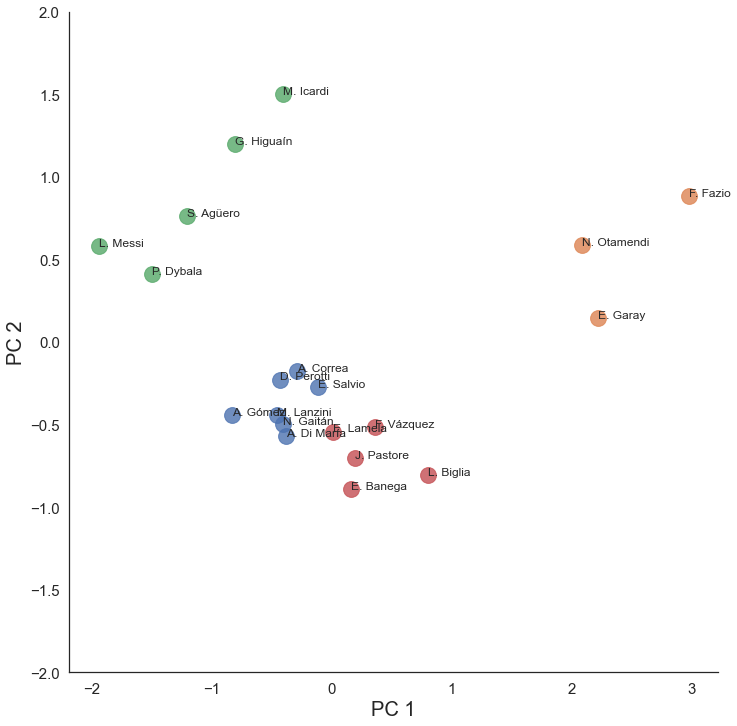

In [294]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

__Hierarchical Clustering__

In [295]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [296]:
np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline

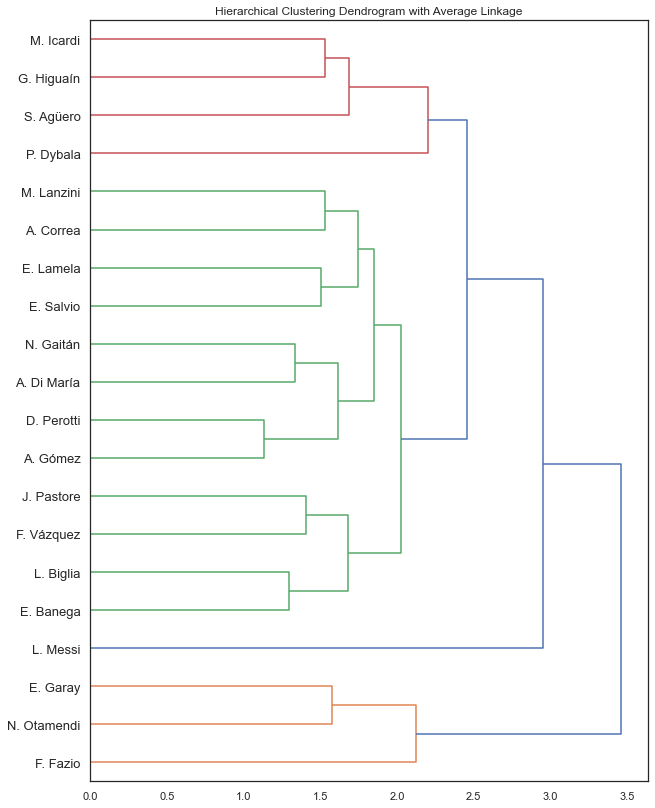

In [297]:
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = dendrogram(linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

### Brazil

In [298]:
#Reading in the datasets
Br_df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Brazil.csv")
Br_df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,2143,Right,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Attacker,26-30
1,Casemiro,26,Brazil,88,90,59500000.0,285000.0,2170,Right,3.0,...,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M,Midfielder,26-30
2,Coutinho,26,Brazil,88,89,69500000.0,340000.0,2175,Right,3.0,...,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M,Attacker,26-30
3,Marcelo,30,Brazil,88,88,43000000.0,285000.0,2279,Left,4.0,...,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M,Defender,26-30
4,Thiago Silva,33,Brazil,88,88,24000000.0,165000.0,2077,Right,4.0,...,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M,Defender,31-35


In [299]:
#Describing the dataset
Br_df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,827.000000,827.000000,827.000000,8.270000e+02,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,...,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,27.625151,71.251511,73.351874,4.602630e+06,17778.718259,1712.134220,1.160822,2.938331,2.627570,18.637243,...,55.166868,65.083434,49.102781,51.160822,48.863362,15.807739,15.402660,15.471584,15.351874,16.037485
std,4.243753,5.590515,5.785576,8.313796e+06,31885.397567,256.012423,0.508536,0.762193,0.857449,20.563466,...,15.748899,10.521237,23.701030,23.589857,23.243254,16.990256,16.187047,15.822643,16.613853,17.267089
min,17.000000,48.000000,59.000000,0.000000e+00,1000.000000,857.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,68.000000,69.000000,7.250000e+05,4000.000000,1593.500000,1.000000,2.000000,2.000000,7.000000,...,47.000000,59.000000,26.000000,28.000000,26.000000,8.000000,8.000000,8.000000,8.000000,9.000000
50%,27.000000,71.000000,73.000000,1.900000e+06,10000.000000,1759.000000,1.000000,3.000000,3.000000,12.000000,...,58.000000,66.000000,56.000000,60.000000,56.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,30.000000,74.000000,77.000000,5.000000e+06,18000.000000,1878.000000,1.000000,3.000000,3.000000,21.000000,...,67.000000,72.000000,70.000000,72.000000,70.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,40.000000,92.000000,93.000000,1.185000e+08,340000.000000,2279.000000,5.000000,5.000000,5.000000,99.000000,...,91.000000,94.000000,90.000000,90.000000,87.000000,85.000000,84.000000,91.000000,84.000000,88.000000


In [300]:
#Extracting numeric columns from the dataset
Br_df.describe().columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [301]:
Br_df = Br_df[['Name','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [302]:
Br_df.head()

,Name,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,Neymar Jr,26,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
1,Casemiro,26,88,90,59500000.0,285000.0,2170,3.0,3.0,2.0,...,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0
2,Coutinho,26,88,89,69500000.0,340000.0,2175,3.0,4.0,5.0,...,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0
3,Marcelo,30,88,88,43000000.0,285000.0,2279,4.0,4.0,5.0,...,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0
4,Thiago Silva,33,88,88,24000000.0,165000.0,2077,4.0,3.0,2.0,...,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0


In [303]:
#Selecting players with an overall score above 80
Br_df = Br_df[Br_df.Overall > 80] 

In [304]:
#Create a separate column for names
player_names= names = Br_df.Name.tolist() # saving names for later

Br_df = Br_df.drop(['Name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
Br_df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,26,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,10.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
1,26,88,90,59500000.0,285000.0,2170,3.0,3.0,2.0,14.0,...,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0
2,26,88,89,69500000.0,340000.0,2175,3.0,4.0,5.0,7.0,...,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0
3,30,88,88,43000000.0,285000.0,2279,4.0,4.0,5.0,12.0,...,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0
4,33,88,88,24000000.0,165000.0,2077,4.0,3.0,2.0,2.0,...,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0


__K-Means__

In [305]:
#Normalizing the dataset

x = Br_df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [306]:
#Combined the many columns existing into 2 columns for comparing

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [307]:
# Created 4 clusters for analysis
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [308]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.063853,1.456394,0,Neymar Jr
1,-0.272155,-0.813229,3,Casemiro
2,-0.976583,0.860093,0,Coutinho
3,-1.034121,-0.237379,3,Marcelo
4,-0.129858,-0.929779,1,Thiago Silva


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


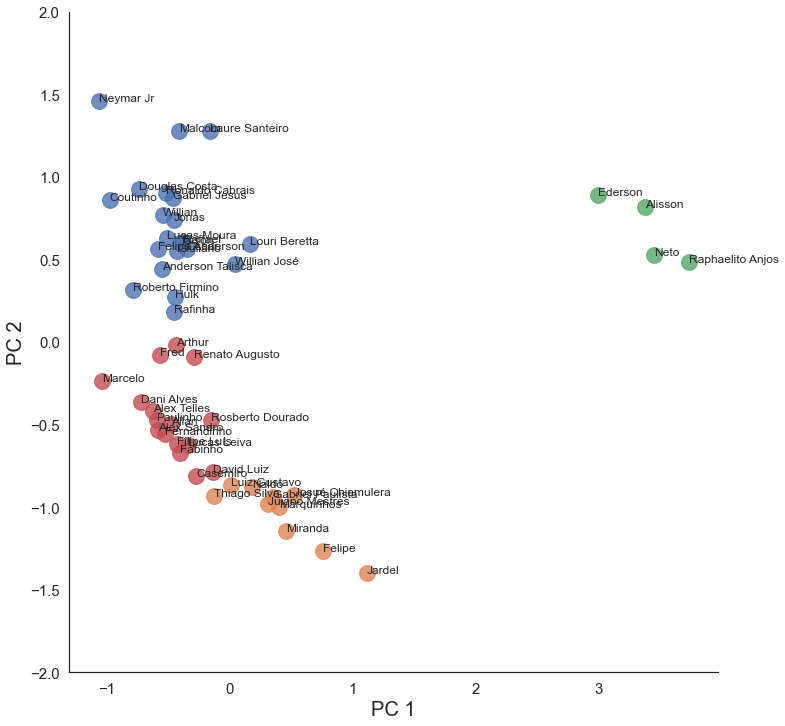

In [309]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

__Hierarchical Clustering__

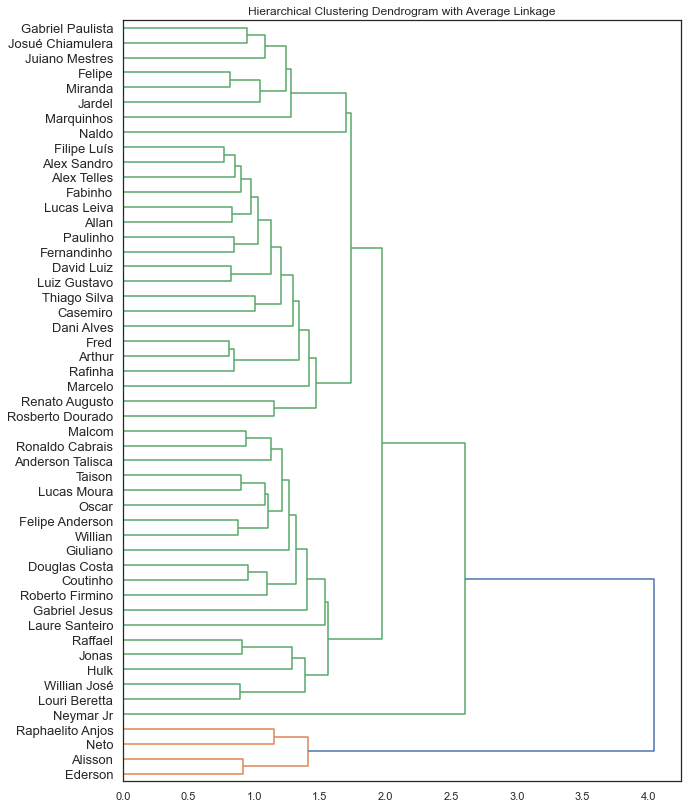

In [310]:
from scipy.cluster.hierarchy import dendrogram, linkage

np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline

plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = dendrogram(linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

### Germany

In [311]:
#Reading in the datasets
Gr_df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Germany.csv")
Gr_df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,...,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M,Midfielder,26-30
1,M. ter Stegen,26,Germany,89,92,58000000.0,240000.0,1328,Right,3.0,...,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M,Goalkeeper,26-30
2,M. Neuer,32,Germany,89,89,38000000.0,130000.0,1473,Right,5.0,...,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M,Goalkeeper,31-35
3,M. Hummels,29,Germany,88,88,46000000.0,160000.0,2038,Right,4.0,...,90.0,88.0,15.0,6.0,10.0,5.0,6.0,€75.9M,Defender,26-30
4,L. Sané,22,Germany,86,92,61000000.0,195000.0,2090,Left,2.0,...,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M,Attacker,22-25


In [312]:
#Describing the dataset
Gr_df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1198.000000,1198.000000,1198.000000,1.198000e+03,1198.000000,1198.000000,1198.00000,1198.000000,1198.000000,1198.000000,...,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,24.338063,66.086811,71.699499,2.529307e+06,9639.398998,1566.782972,1.13606,3.126043,2.273790,19.176127,...,45.561770,56.229549,46.964107,47.500835,45.090985,18.095993,17.722037,17.214524,17.464107,18.128548
std,4.243240,6.638976,5.760017,6.224263e+06,22121.375147,288.120087,0.44854,0.700857,0.742659,11.519691,...,15.477877,13.288140,20.732039,22.315492,22.190921,19.371364,18.284726,17.716836,18.271506,19.741568
min,17.000000,47.000000,57.000000,1.000000e+04,1000.000000,788.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,68.000000,3.500000e+05,1000.000000,1437.000000,1.00000,3.000000,2.000000,9.000000,...,36.000000,49.000000,29.000000,26.000000,22.000000,8.000000,9.000000,8.000000,8.000000,8.000000
50%,24.000000,66.000000,71.000000,6.750000e+05,3000.000000,1606.000000,1.00000,3.000000,2.000000,19.000000,...,47.000000,58.000000,53.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,27.000000,70.000000,75.000000,1.400000e+06,8000.000000,1754.750000,1.00000,3.000000,3.000000,28.000000,...,57.000000,66.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,39.000000,90.000000,92.000000,7.650000e+07,355000.000000,2203.000000,5.00000,5.000000,5.000000,90.000000,...,90.000000,91.000000,88.000000,90.000000,88.000000,90.000000,86.000000,91.000000,87.000000,90.000000


In [313]:
Gr_df = Gr_df[['Name','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [314]:
#Selecting players with an overall score above 80
Gr_df = Gr_df[Gr_df.Overall > 80] 

In [315]:
#Create a separate column for names
player_names= names = Gr_df.Name.tolist() # saving names for later

Gr_df = Gr_df.drop(['Name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
Gr_df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,28,90,90,76500000.0,355000.0,2190,4.0,5.0,3.0,8.0,...,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0
1,26,89,92,58000000.0,240000.0,1328,3.0,4.0,1.0,22.0,...,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0
2,32,89,89,38000000.0,130000.0,1473,5.0,4.0,1.0,1.0,...,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0
3,29,88,88,46000000.0,160000.0,2038,4.0,3.0,3.0,5.0,...,68.0,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0
4,22,86,92,61000000.0,195000.0,2090,2.0,3.0,4.0,19.0,...,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0


__K-Means__

In [316]:
#Normalizing the dataset

x = Gr_df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [317]:
#Combined the many columns existing into 2 columns for comparing

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [318]:
# Created 4 clusters for analysis
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [319]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.232304,-0.225221,3,T. Kroos
1,3.124842,-0.532824,1,M. ter Stegen
2,2.789711,-0.630173,1,M. Neuer
3,-0.609770,0.733395,0,M. Hummels
4,-1.053347,-1.052096,2,L. Sané


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


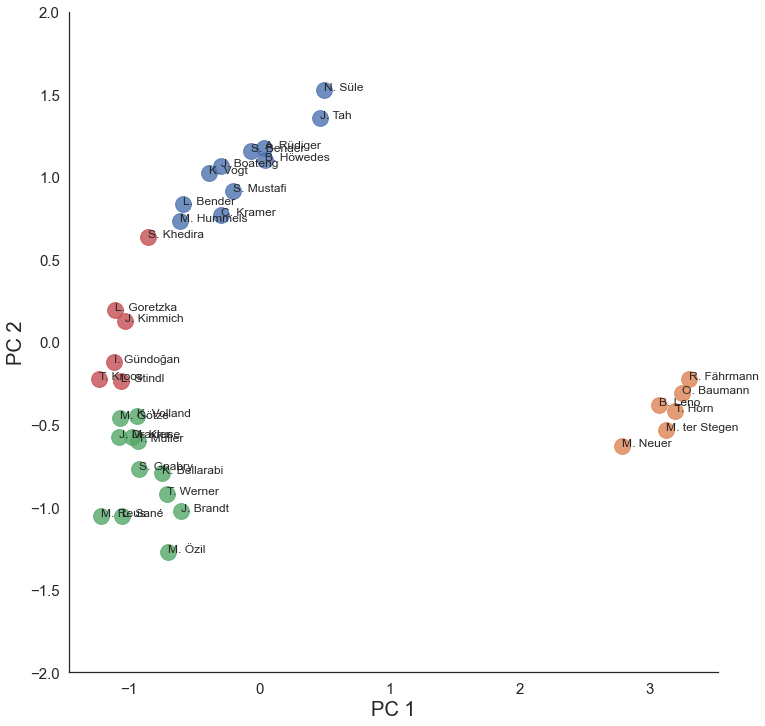

In [320]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

__Hierarchical Clustering__

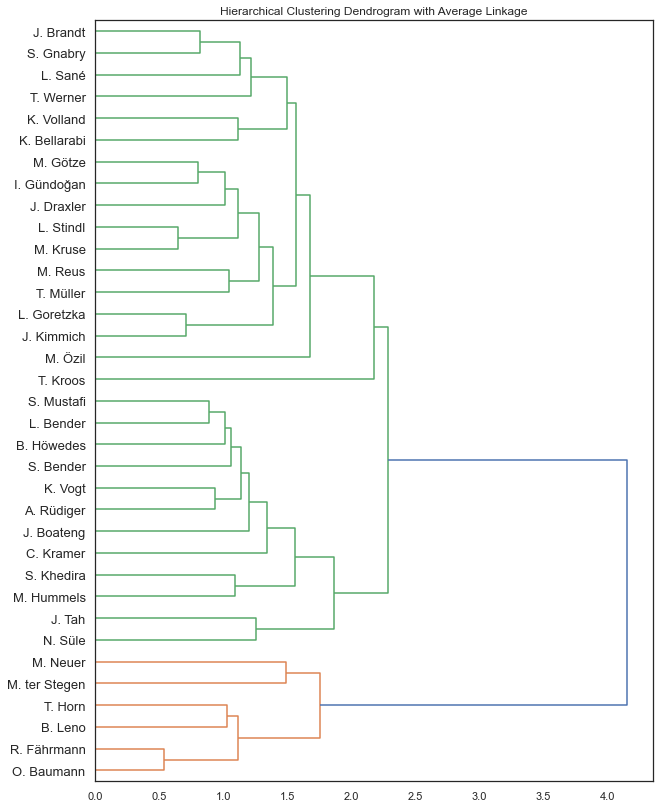

In [321]:
from scipy.cluster.hierarchy import dendrogram, linkage

np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline

plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = dendrogram(linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

### Spain

In [322]:
#Reading in the dataset
Sp_df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Spain.csv")
Sp_df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,De Gea,27,Spain,91,93,72000000.0,260000.0,1471,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Goalkeeper,26-30
1,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,2201,Right,4.0,...,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,Defender,31-35
2,David Silva,32,Spain,90,90,60000000.0,285000.0,2115,Left,4.0,...,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M,Midfielder,31-35
3,Sergio Busquets,29,Spain,89,89,51500000.0,315000.0,2065,Right,4.0,...,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M,Midfielder,26-30
4,Isco,26,Spain,88,91,73500000.0,315000.0,2137,Right,3.0,...,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M,Attacker,26-30


In [323]:
#Describing the dataset
Sp_df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1072.000000,1072.000000,1072.000000,1.072000e+03,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,25.325560,69.698694,74.616604,4.390718e+06,16322.761194,1664.870336,1.179104,3.001866,2.476679,17.536381,...,50.967351,60.612873,50.271455,50.402985,48.177239,16.795709,16.819963,16.392724,16.687500,16.852612
std,4.651373,6.494103,5.604905,7.698894e+06,33260.569385,265.224562,0.516409,0.544899,0.790594,10.998454,...,16.144072,11.083519,19.334203,22.839470,22.594843,18.495167,18.050563,17.228125,17.948321,18.567833
min,16.000000,51.000000,57.000000,6.000000e+04,1000.000000,814.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,65.000000,71.000000,6.250000e+05,3000.000000,1537.750000,1.000000,3.000000,2.000000,8.000000,...,41.000000,54.000000,35.750000,28.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,69.000000,74.000000,1.200000e+06,6000.000000,1706.000000,1.000000,3.000000,3.000000,17.000000,...,51.000000,61.000000,56.000000,60.000000,56.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,74.000000,78.000000,5.000000e+06,17000.000000,1846.500000,1.000000,3.000000,3.000000,26.000000,...,63.000000,68.000000,65.000000,69.000000,67.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,39.000000,91.000000,93.000000,7.350000e+07,380000.000000,2230.000000,4.000000,5.000000,5.000000,87.000000,...,88.000000,93.000000,91.000000,92.000000,91.000000,90.000000,85.000000,87.000000,88.000000,94.000000


In [324]:
Sp_df = Sp_df[['Name','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [325]:
#Selecting players with an overall score above 80
Sp_df = Sp_df[Sp_df.Overall > 80] 

In [326]:
#Create a separate column for names
player_names= names = Sp_df.Name.tolist() # saving names for later

Sp_df = Sp_df.drop(['Name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
Sp_df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,27,91,93,72000000.0,260000.0,1471,4.0,3.0,1.0,1.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
1,32,91,91,51000000.0,380000.0,2201,4.0,3.0,3.0,15.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
2,32,90,90,60000000.0,285000.0,2115,4.0,2.0,4.0,21.0,...,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0
3,29,89,89,51500000.0,315000.0,2065,4.0,3.0,3.0,5.0,...,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0
4,26,88,91,73500000.0,315000.0,2137,3.0,3.0,4.0,22.0,...,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0


__K-Means__

In [327]:
#Normalizing the dataset

x = Sp_df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [328]:
#Combined the many columns existing into 2 columns for comparing

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [329]:
# Created 4 clusters for analysis
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [330]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,3.007182,0.102894,2,De Gea
1,-0.644418,1.236600,0,Sergio Ramos
2,-0.870866,-0.289938,1,David Silva
3,-0.483861,1.108650,0,Sergio Busquets
4,-0.841203,-0.115421,1,Isco


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


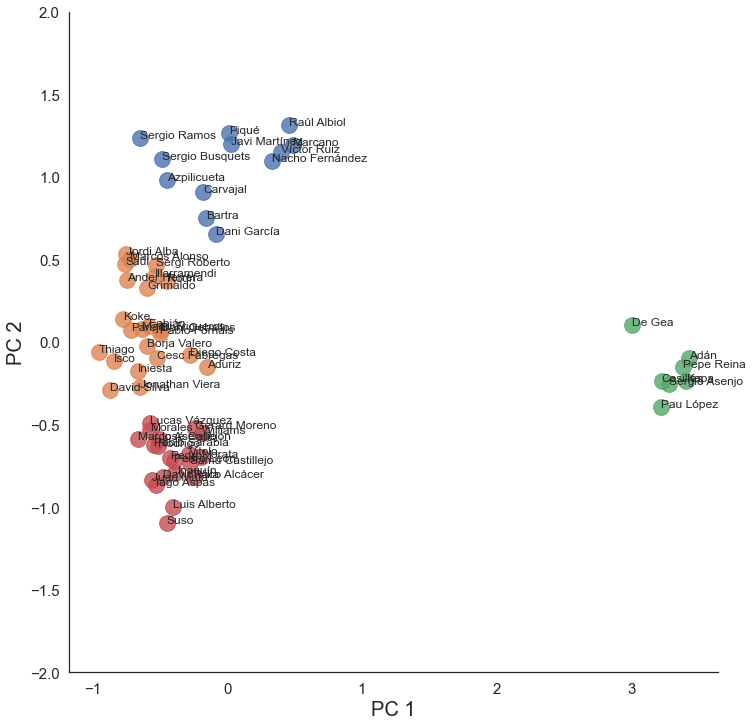

In [331]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

__Hierarchical Clustering__

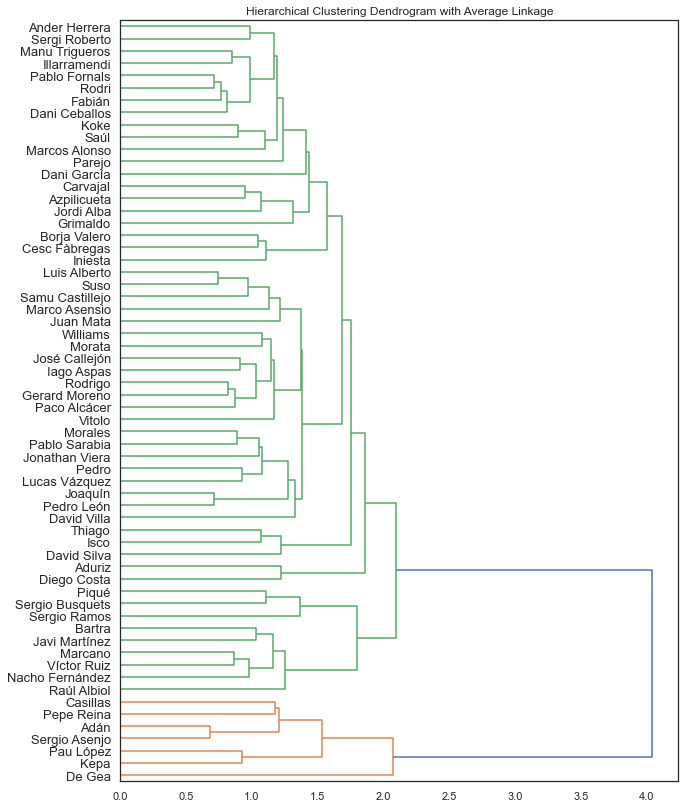

In [332]:
from scipy.cluster.hierarchy import dendrogram, linkage

np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline

plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = dendrogram(linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

### Italy

In [333]:
#Reading in the dataset
It_df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Italy.csv")
It_df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,G. Chiellini,33,Italy,89,89,27000000.0,215000.0,1841,Left,4.0,...,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M,Defender,31-35
1,L. Insigne,27,Italy,88,88,62000000.0,165000.0,2017,Right,3.0,...,24.0,22.0,8.0,4.0,14.0,9.0,10.0,€105.4M,Attacker,26-30
2,G. Buffon,40,Italy,88,88,4000000.0,77000.0,1334,Right,4.0,...,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,Goalkeeper,36-40
3,C. Immobile,28,Italy,87,87,52000000.0,115000.0,2009,Right,3.0,...,33.0,32.0,6.0,8.0,15.0,12.0,6.0,€88.4M,Attacker,26-30
4,M. Verratti,25,Italy,86,89,55000000.0,135000.0,2149,Right,3.0,...,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M,Midfielder,22-25


In [334]:
#Describing the dataset
It_df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,702.000000,702.000000,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,...,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,25.928775,68.158120,72.690883,3.047571e+06,13478.632479,1604.572650,1.202279,2.834758,2.386040,21.009972,...,48.182336,62.263533,48.948718,48.152422,46.470085,17.311966,17.032764,16.411681,16.910256,17.585470
std,4.837213,6.530675,6.107445,5.975033e+06,23222.092741,288.763105,0.488493,0.737068,0.820896,18.999622,...,17.293912,10.921993,21.752798,23.642447,23.428127,19.808019,19.025632,17.542938,19.098713,20.265723
min,17.000000,47.000000,53.000000,1.000000e+04,1000.000000,731.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,64.000000,68.000000,5.000000e+05,1000.000000,1463.000000,1.000000,2.000000,2.000000,9.000000,...,37.000000,57.000000,28.000000,22.000000,21.000000,8.000000,8.000000,7.000000,7.000000,8.000000
50%,26.000000,68.000000,72.000000,9.000000e+05,3000.000000,1650.000000,1.000000,3.000000,2.000000,18.000000,...,51.000000,63.000000,57.000000,58.000000,57.000000,11.000000,11.000000,10.000000,10.000000,11.000000
75%,29.000000,72.000000,76.000000,2.800000e+06,15000.000000,1800.750000,1.000000,3.000000,3.000000,26.000000,...,61.000000,70.000000,66.000000,68.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,40.000000,89.000000,93.000000,6.200000e+07,215000.000000,2253.000000,4.000000,5.000000,5.000000,99.000000,...,92.000000,93.000000,94.000000,93.000000,90.000000,88.000000,87.000000,76.000000,90.000000,90.000000


In [335]:
It_df = It_df[['Name','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [336]:
#Selecting players with an overall score above 80
It_df = It_df[It_df.Overall > 80] 

In [337]:
#Create a separate column for names
player_names= names = It_df.Name.tolist() # saving names for later

It_df = It_df.drop(['Name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
It_df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,33,89,89,27000000.0,215000.0,1841,4.0,3.0,2.0,3.0,...,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0
1,27,88,88,62000000.0,165000.0,2017,3.0,3.0,4.0,10.0,...,61.0,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0
2,40,88,88,4000000.0,77000.0,1334,4.0,2.0,1.0,1.0,...,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0
3,28,87,87,52000000.0,115000.0,2009,3.0,4.0,3.0,17.0,...,78.0,81.0,34.0,33.0,32.0,6.0,8.0,15.0,12.0,6.0
4,25,86,89,55000000.0,135000.0,2149,3.0,4.0,4.0,6.0,...,64.0,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0


__K-Means__

In [338]:
#Normalizing the dataset

x = It_df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [339]:
#Combined the many columns existing into 2 columns for comparing

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [340]:
# Created 4 clusters for analysis
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [341]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.189829,1.730823,2,G. Chiellini
1,-1.089239,-0.947842,0,L. Insigne
2,2.921179,-0.021334,1,G. Buffon
3,-0.843840,-0.260048,3,C. Immobile
4,-1.100353,0.338830,3,M. Verratti


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


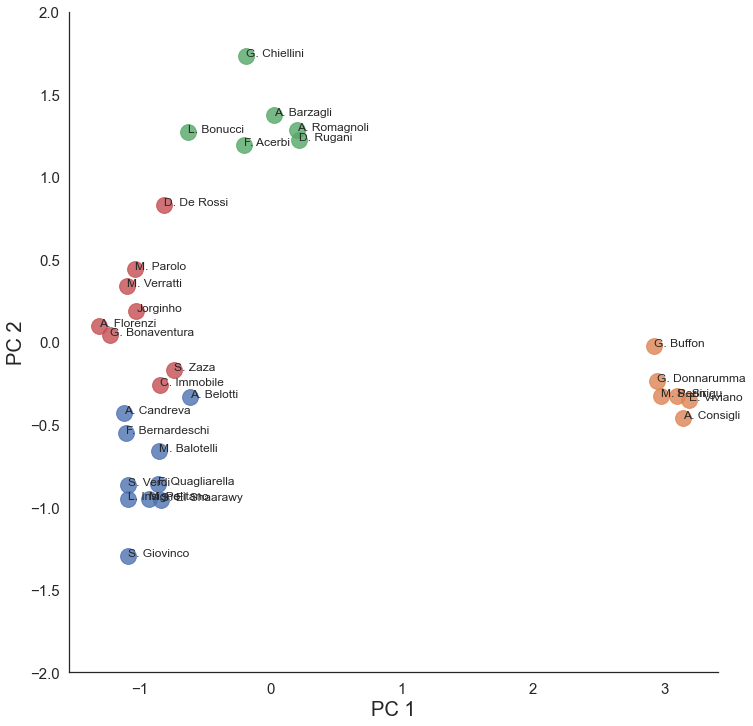

In [342]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

__Hierarchical Clustering__

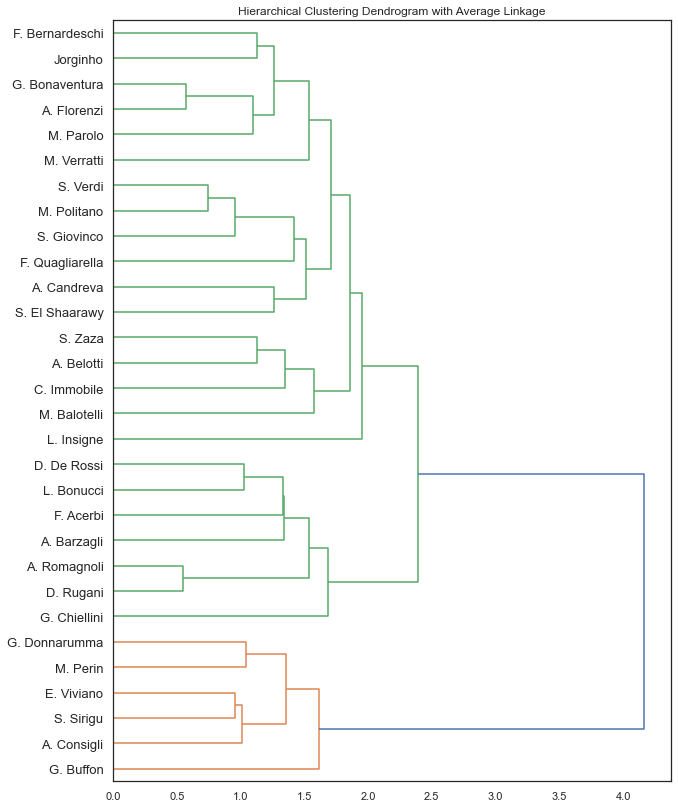

In [343]:
from scipy.cluster.hierarchy import dendrogram, linkage

np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline

plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = dendrogram(linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')